<a href="https://colab.research.google.com/github/noallynoclan/colab/blob/master/wandb_optimize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import scipy.optimize as opt

In [14]:
! pip install wandb -qqq
import wandb
wandb.login()

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


True

1048576


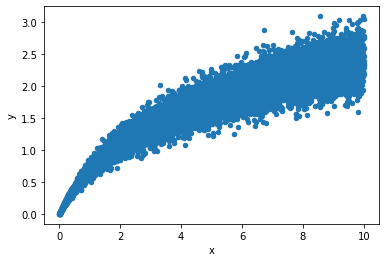

In [30]:
df = pd.DataFrame({'x': np.linspace(0, 10, 2 ** 20)})
df['y'] = np.log(df['x'] + 1) * np.random.normal(1, 0.1, size=len(df))
df[::100].plot(x='x', y='y', kind='scatter')
print(len(df))

In [38]:
def pred(x, pars):
    a, b = pars
    return a * np.log(b * x + 1)

def mse(y_true, y_pred):
    se = (y_true - y_pred) ** 2
    return np.mean(se)

def fit(x, y, opt_name, bounds):
    name = str(datetime.now())
    wandb.init(project='opt', name=f'{opt_name}, {name}')
    opt_func = {
        'diff_evo': opt.differential_evolution,
        'dual_ann': opt.dual_annealing
    }[opt_name]
    def loss(pars):
        a, b = pars
        y_pred = pred(x, pars)
        loss = mse(y, y_pred)
        wandb.log({'a': a, 'b': b, 'loss': loss})
        return loss
    pars = opt_func(loss, bounds).x
    return pars

a,0.99965
b,1.0006
loss,0.03055
_step,569
_runtime,29
_timestamp,1608830511


a,▆▄▂▃▅█▂▂▂▁▃▁▂▂▂▂▁▁▁▂▂▂▂▂▁▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂
b,▄▂▇█▁█▂▁▇▆▆▁▂▂▂▁▃▂▃▂▁▂▂▃▃▄▆▂▇▂▂▂▂▂▂▂▂▂▂▂
loss,▃▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_runtime,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇██
_timestamp,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇██


[0.99963439 1.00063703]


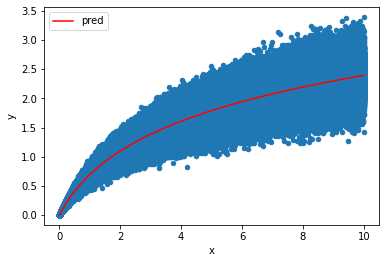

In [39]:
pars = fit(df['x'], df['y'], 'dual_ann', bounds=[[0, 10], [0, 10]])
print(pars)

df['pred'] = pred(df['x'], pars)
ax = df.plot(x='x', y='y', kind='scatter')
df.plot(x='x', y='pred', ax=ax, c='r')

In [12]:
time()

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


()

In [13]:
from datetime import datetime

# datetime object containing current date and time
now = datetime.now()

print("now =", now)

# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")

now = 2020-12-24 16:49:08.829507
date and time = 24/12/2020 16:49:08
